This notebook takes a look at the results from a hypothetical slot machine through the lens of probability
* Tutors:
  * Anthropic's AI Claude
  * Google's Gemini

Given a slot machine and five observed payouts

Observed numbers = [0,0,1.5,0,1.5]
  * Sum = 3
  * Average = 3/5 = 0.6
  * Sample size = 5



Methods used for developing probability estimates
* Guess 1 = discrete probability distribution, binomal distribution
* Guess 2 = continous probability distribution, normal distribution
* Guess 3 = monte carlo approach
* Guess 4 = bayseian approach


Initial Data Analysis:
Observed results: [0, 0, 1.5, 0, 1.5]
Sample size: 5
Observed wins: 2 out of 5 spins
Average Payout: $0.600

Mean: 0.6
Median: 0
Standard deviation: 0.7348469228349535

Binomial Distribution Results:
Average Payout: $0.600
Probability of exactly 2 wins in 5 spins: 0.346
Parameters: n=5 trials, p=0.40 success probability

Normal Distribution Results:
Average Payout: $0.000
Probability density at mean: 0.389
Distribution parameters: μ=0.00, σ=0.73

Monte Carlo Simulation Results:
Average Payout: $0.600
Win Probability: 0.400

Bayesian Analysis Results:
Average Payout: $0.643
Posterior probability of winning: 0.429

Summary of Average Payouts Across Methods:
Observed Data Average:     $0.600
Binomial Expected:         $0.600
Normal Distribution Mean:  $0.000
Monte Carlo Simulated:     $0.600
Bayesian Expected:         $0.643


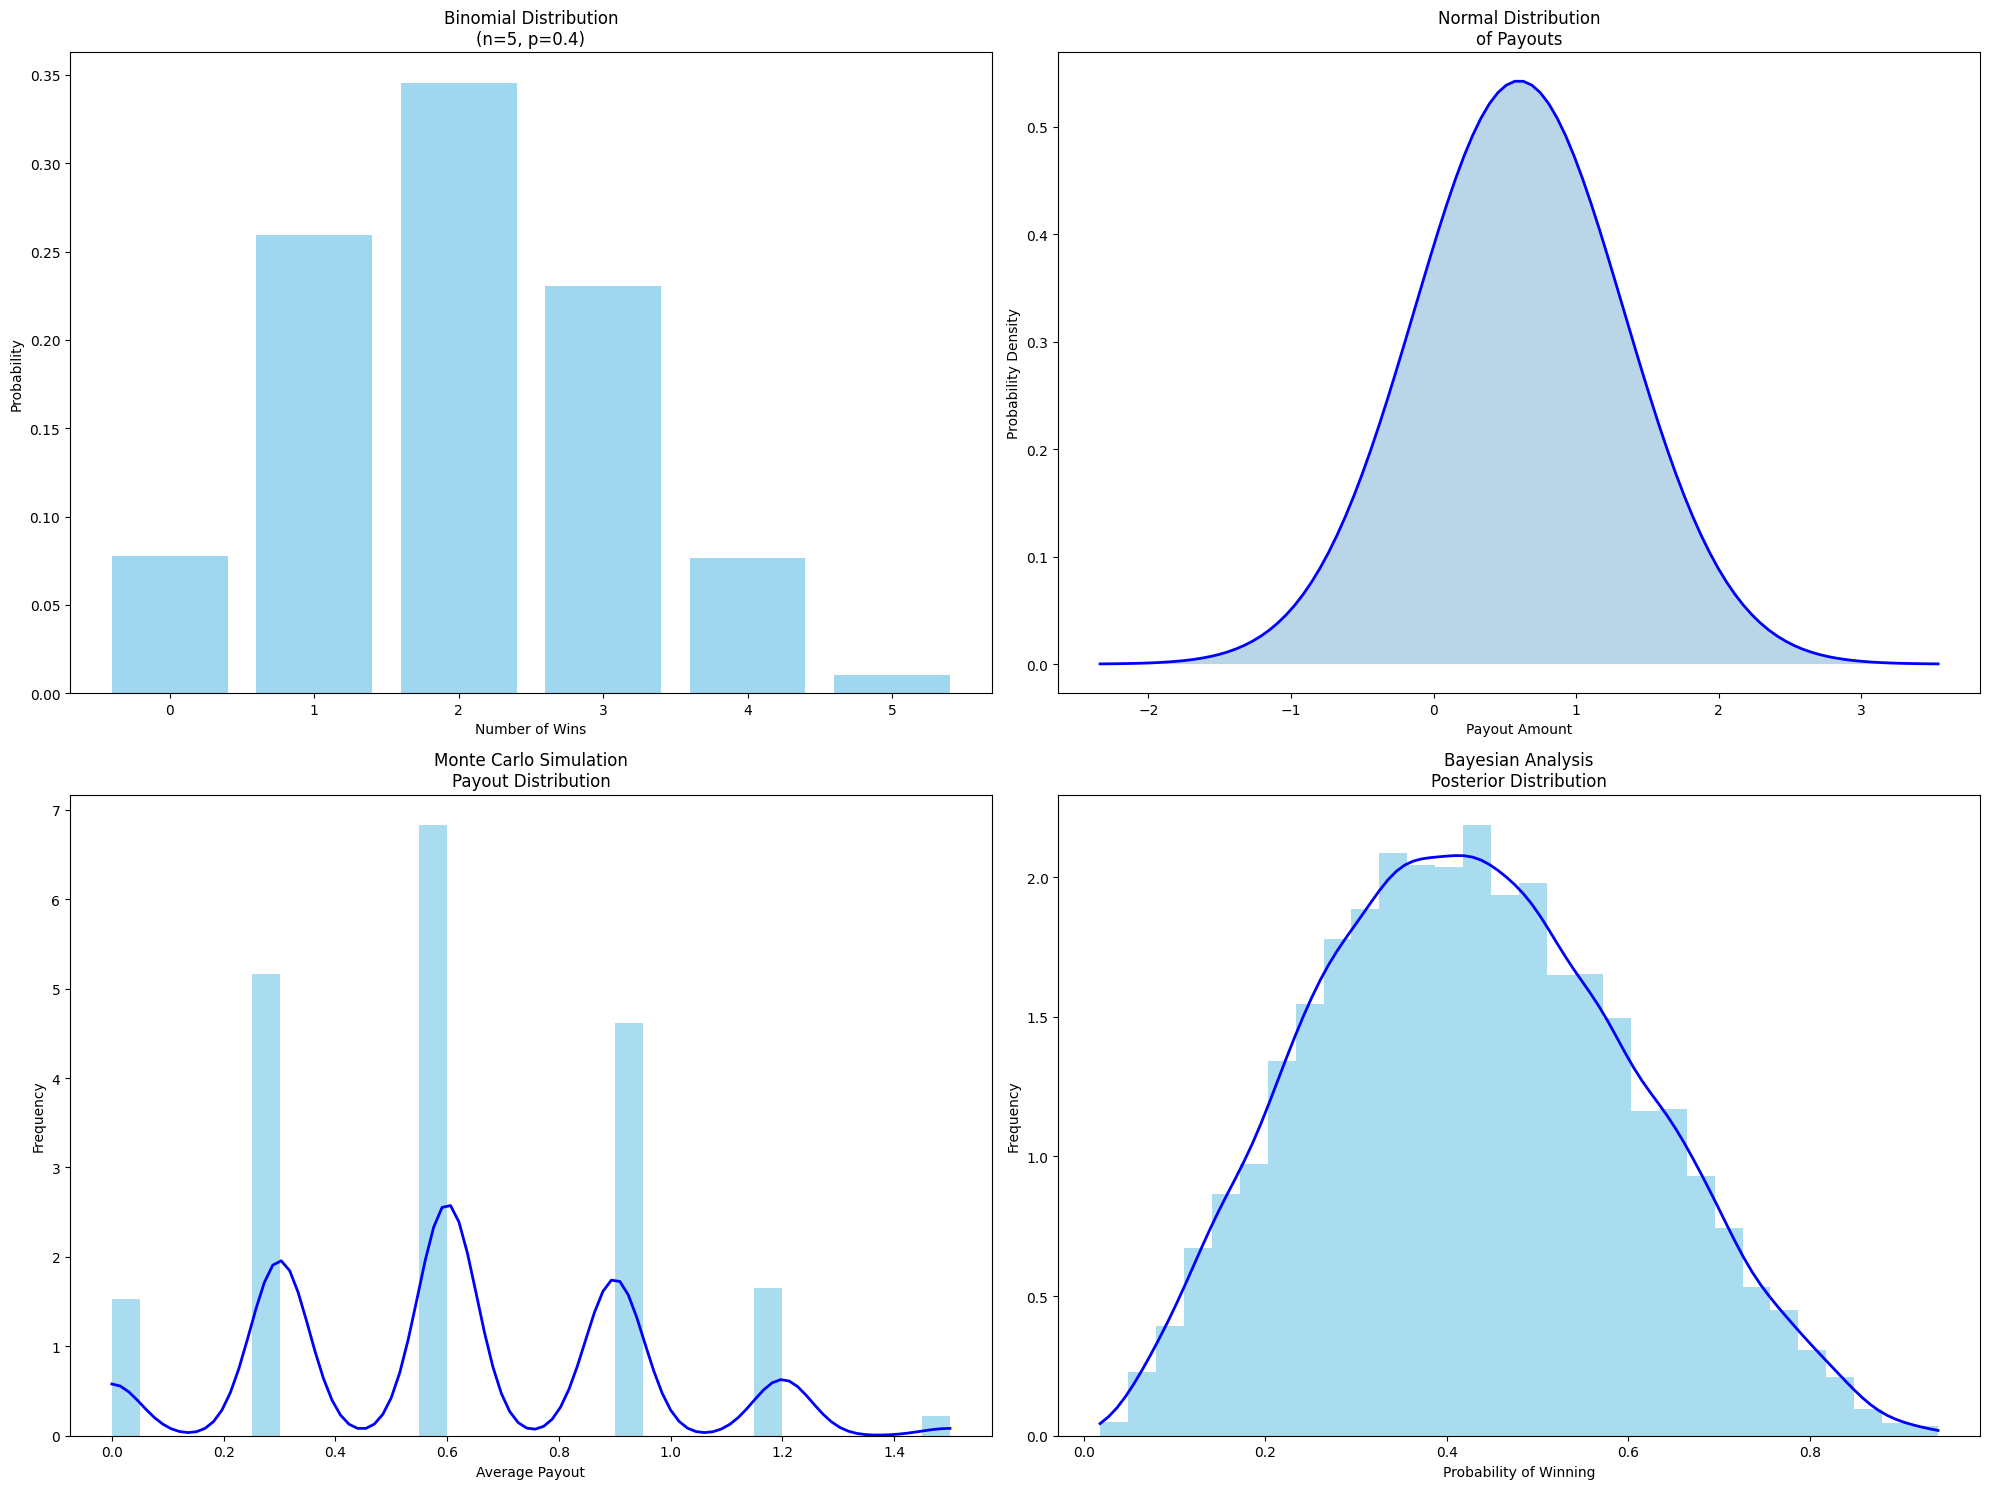

In [9]:
import numpy as np
from scipy.stats import binom
from scipy import stats
import matplotlib.pyplot as plt

# [Previous StatisticalCalculator class remains the same]
class StatisticalCalculator:
    """
    A class containing basic statistical calculation methods.
    All calculations are implemented manually for educational purposes.
    """

    @staticmethod
    def calc_mean(numbers):
        total = sum(numbers)
        pop = len(numbers)
        return total/pop

    @staticmethod
    def calc_median(numbers):
        sorted_numbers = sorted(numbers)
        n = len(sorted_numbers)
        if n % 2 == 0:
            return (sorted_numbers[n//2 - 1] + sorted_numbers[n//2]) / 2
        else:
            return sorted_numbers[n//2]

    @staticmethod
    def calc_standard_deviation(numbers):
        n = len(numbers)
        mean = sum(numbers) / n
        squared_diff_sum = sum((x - mean) ** 2 for x in numbers)
        variance = squared_diff_sum / n
        return variance ** 0.5

class ProbabilityAnalyzer:
    """
    A class containing methods for different probability distribution analyses.
    """

    @staticmethod
    def binomial_distribution(k, n, p):
        return binom.pmf(k, n, p)

    @staticmethod
    def normal_distribution(x, mu, sigma):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

    @staticmethod
    def monte_carlo_simulation(observed_data, n_simulations=10000, n_spins=5):
        unique_payouts = np.unique(observed_data)
        payout_probs = [np.mean(np.array(observed_data) == payout) for payout in unique_payouts]

        simulation_results = []
        win_counts = []

        for _ in range(n_simulations):
            spins = np.random.choice(unique_payouts, size=n_spins, p=payout_probs)
            simulation_results.append(np.mean(spins))
            win_counts.append(np.sum(spins > 0) / n_spins)

        return {
            'average_payout': np.mean(simulation_results),
            'win_probability': np.mean(win_counts),
            'confidence_interval': stats.norm.interval(0.95, loc=np.mean(win_counts),
                                                    scale=stats.sem(win_counts)),
            'payout_distribution': {float(payout): len([x for x in simulation_results
                                                      if x == payout]) / n_simulations
                                  for payout in unique_payouts},
            'simulation_results': simulation_results,
            'win_counts': win_counts
        }

    @staticmethod
    def bayesian_slot_probability(observed_data, prior_prob=0.4, n_samples=10000):
        wins = sum(1 for payout in observed_data if payout > 0)
        total_spins = len(observed_data)

        alpha = 1 + wins
        beta = 1 + (total_spins - wins)

        # Generate samples for visualization
        samples = np.random.beta(alpha, beta, n_samples)

        return {
            'posterior_prob': alpha / (alpha + beta),
            'samples': samples
        }

class Visualizer:
    """
    A class to create visualizations for different probability analyses.
    """

    @staticmethod
    def plot_all_distributions(numbers):
        fig = plt.figure(figsize=(20, 15))

        # 1. Binomial Distribution
        ax1 = fig.add_subplot(221)
        n, p = 5, 0.4
        k = np.arange(0, n+1)
        binomial = [binom.pmf(x, n, p) for x in k]
        ax1.bar(k, binomial, alpha=0.8, color='skyblue')
        ax1.set_title('Binomial Distribution\n(n=5, p=0.4)')
        ax1.set_xlabel('Number of Wins')
        ax1.set_ylabel('Probability')

        # 2. Normal Distribution
        ax2 = fig.add_subplot(222)
        mean = StatisticalCalculator.calc_mean(numbers)
        std = StatisticalCalculator.calc_standard_deviation(numbers)
        x = np.linspace(mean - 4*std, mean + 4*std, 100)
        y = stats.norm.pdf(x, mean, std)
        ax2.plot(x, y, 'b-', lw=2, label='Normal Distribution')
        ax2.fill_between(x, y, alpha=0.3)
        ax2.set_title('Normal Distribution\nof Payouts')
        ax2.set_xlabel('Payout Amount')
        ax2.set_ylabel('Probability Density')

        # 3. Monte Carlo Simulation
        ax3 = fig.add_subplot(223)
        mc_results = ProbabilityAnalyzer.monte_carlo_simulation(numbers)
        hist_data = mc_results['simulation_results']
        ax3.hist(hist_data, bins=30, density=True, alpha=0.7, color='skyblue')
        # Add kernel density estimation
        kde_x = np.linspace(min(hist_data), max(hist_data), 100)
        kde = stats.gaussian_kde(hist_data)
        ax3.plot(kde_x, kde(kde_x), 'b-', lw=2)
        ax3.set_title('Monte Carlo Simulation\nPayout Distribution')
        ax3.set_xlabel('Average Payout')
        ax3.set_ylabel('Frequency')

        # 4. Bayesian Analysis
        ax4 = fig.add_subplot(224)
        bayesian_results = ProbabilityAnalyzer.bayesian_slot_probability(numbers)
        hist_data = bayesian_results['samples']
        ax4.hist(hist_data, bins=30, density=True, alpha=0.7, color='skyblue')
        # Add kernel density estimation
        kde_x = np.linspace(min(hist_data), max(hist_data), 100)
        kde = stats.gaussian_kde(hist_data)
        ax4.plot(kde_x, kde(kde_x), 'b-', lw=2)
        ax4.set_title('Bayesian Analysis\nPosterior Distribution')
        ax4.set_xlabel('Probability of Winning')
        ax4.set_ylabel('Frequency')

        plt.tight_layout()
        return fig

# [Rest of the classes and main function remain the same]
class ResultsFormatter:
    """
    A class to format and display analysis results.
    """

    @staticmethod
    def print_initial_analysis(numbers):
        stats = StatisticalCalculator()
        total_payout = sum(numbers)
        average_payout = total_payout / len(numbers)

        print("\nInitial Data Analysis:")
        print(f"Observed results: {numbers}")
        print(f"Sample size: {len(numbers)}")
        print(f"Observed wins: {sum(1 for x in numbers if x > 0)} out of {len(numbers)} spins")
        print(f"Average Payout: ${average_payout:.3f}\n")

        print(f"Mean: {stats.calc_mean(numbers)}")
        print(f"Median: {stats.calc_median(numbers)}")
        print(f"Standard deviation: {stats.calc_standard_deviation(numbers)}\n")

    @staticmethod
    def print_and_plot_all_results(numbers):
        """Print comprehensive analysis results and create visualizations."""
        analyzer = ProbabilityAnalyzer()

        # Calculate all results
        k, n, p = 2, 5, 0.4
        bin_prob = analyzer.binomial_distribution(k, n, p)
        expected_payout = p * 1.5

        mean = StatisticalCalculator.calc_mean(numbers)
        median = StatisticalCalculator.calc_median(numbers)
        std_dev = StatisticalCalculator.calc_standard_deviation(numbers)
        norm_prob = analyzer.normal_distribution(mean, median, std_dev)

        monte_carlo_results = analyzer.monte_carlo_simulation(numbers)
        bayesian_results = analyzer.bayesian_slot_probability(numbers)
        posterior_prob = bayesian_results['posterior_prob']

        # Print all results
        ResultsFormatter.print_initial_analysis(numbers)

        # Print distribution results
        print("Binomial Distribution Results:")
        print(f"Average Payout: ${expected_payout:.3f}")
        print(f"Probability of exactly {k} wins in {n} spins: {bin_prob:.3f}")
        print(f"Parameters: n={n} trials, p={p:.2f} success probability\n")

        print("Normal Distribution Results:")
        print(f"Average Payout: ${median:.3f}")
        print(f"Probability density at mean: {norm_prob:.3f}")
        print(f"Distribution parameters: μ={median:.2f}, σ={std_dev:.2f}\n")

        print("Monte Carlo Simulation Results:")
        print(f"Average Payout: ${monte_carlo_results['average_payout']:.3f}")
        print(f"Win Probability: {monte_carlo_results['win_probability']:.3f}\n")

        print("Bayesian Analysis Results:")
        print(f"Average Payout: ${posterior_prob * 1.5:.3f}")
        print(f"Posterior probability of winning: {posterior_prob:.3f}\n")

        # Print summary
        print("Summary of Average Payouts Across Methods:")
        print(f"Observed Data Average:     ${sum(numbers)/len(numbers):.3f}")
        print(f"Binomial Expected:         ${expected_payout:.3f}")
        print(f"Normal Distribution Mean:  ${median:.3f}")
        print(f"Monte Carlo Simulated:     ${monte_carlo_results['average_payout']:.3f}")
        print(f"Bayesian Expected:         ${posterior_prob * 1.5:.3f}")

        # Create and display visualizations
        fig = Visualizer.plot_all_distributions(numbers)
        plt.show()

def main():
    """Main execution function."""
    # Sample data
    numbers = [0, 0, 1.5, 0, 1.5]

    # Print all results and create visualizations
    ResultsFormatter.print_and_plot_all_results(numbers)

if __name__ == "__main__":
    main()